In [ ]:
# predict stock price using Monte Carlo Simulation
# It is a method that allows for the generation of future potential outcomes of a given event

# include the stochastic voliatity model
# if time is permitted, include the reduce variance

# To be continued


In [76]:
from pandas_datareader import data as wb
import pandas as pd
import numpy as np
import math
import datetime
from matplotlib import style
import matplotlib.pyplot as plt

In [7]:
# import company data
ticker = 'AAPL'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-1-1')['Adj Close']

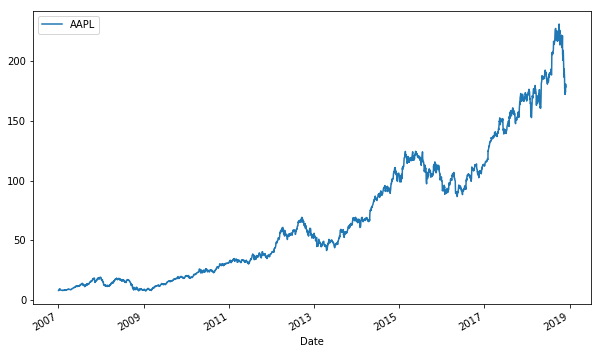

In [18]:
# analysis the return
data.fillna(0)
log_returns = np.log(1+data.pct_change())
log_returns.head()
data.plot(figsize=(10,6))

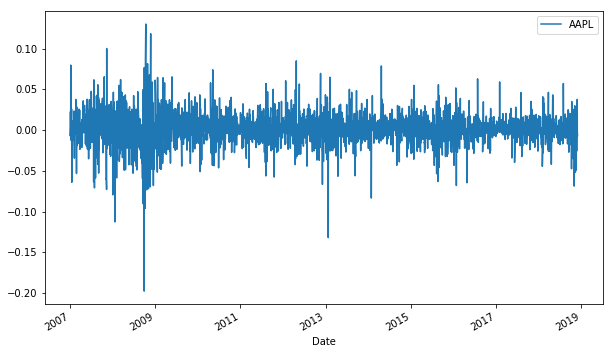

In [20]:
log_returns.plot(figsize=(10,6))

In [163]:
class Monte_Carlo:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    
    def get_stock(self,name):
        start = self.start
        end = self.end
        
        prices = wb.DataReader(name, 'yahoo', start, end)['Close']
        returns = prices.pct_change()
        
        self.prices = prices
        self.returns = returns
        
    def BrownianMotion(self, num_simulations, predicted_days): # predicted_days/ timesteps
        # step = time/n
        
        # volatitlity can be changed
        # stochatistic volatitlity model
        
        prices = self.prices
        returns = self.returns
        
        last_price = prices[-1] # last point
        
        # split the simulation into two parts
        # consider the drift first
        
        simulation_df = pd.DataFrame()
        
        # create each simulation as a column in df
        
        for x in range(num_simulations):
            
            count = 0 # keep track of the nth simulation
            
            avg_daily_return = returns.mean()
            var = returns.var()
            
            daily_vol = returns.std()
            drift = avg_daily_return - 0.5*daily_vol**2
            
            # simulation
            # initial point to be simulated 
            prices = []
            exp_part  = drift + daily_vol * np.random.normal()
            
            prices.append(last_price*math.exp(exp_part))
            # generate the stock for each day
            # different from the conventional way that split the days 
            # in this case, the delta unit is 
            
            for i in range(1, predicted_days):
                
                exp_part = drift + daily_vol*np.random.normal()
                price = prices[count] * math.exp(exp_part)
                prices.append(price)
                
                count+=1
                
            simulation_df[x] = prices
            self.simulation_df = simulation_df
            self.predicted_days = predicted_days
        
    def get_prices(self):
        
        simulation_df = self.simulation_df
        
        sim_mean = np.mean(simulation_df.iloc[-1:])
        return sim_mean.mean()
    
  
    def line_graph(self): # initialize the graph
        prices = self.prices
        predicted_days = self.predicted_days
        simulation_df = self.simulation_df
        
        #last_price = prices[-1]
        fig = plt.figure()
        style.use('bmh')
        
        title = 'Monte Carlo Simulation'
        plt.plot(simulation_df)
       
        
        
    
    '''
    analysis of stock
    1. line_graph 
    2. VaR 
    3. key statistics
    
    '''
    
        

In [164]:
start = '2017-1-1'
end = '2018-1-1'
sim = Monte_Carlo(start, end)
sim.get_stock('AAPL')


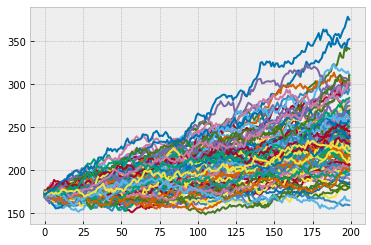

In [165]:
sim.BrownianMotion(100,200)
sim.line_graph()

In [166]:
sim.get_prices()

241.1942143520066